In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
df.head()
bins = [0, 12, 18, 35, 60, 100]  # Define meaningful age ranges
labels = ["Child (0-12)", "Teen (13-18)", "Young Adult (19-35)", "Adult (36-60)", "Senior (61+)"]

df["Age Group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
age_survival = df.groupby(["Age Group", "survived"]).size().unstack()
print(age_survival)
df.groupby(["Age Group", "survived"]).count()# Survival count per age group


survived               0    1
Age Group                    
Child (0-12)          29   39
Teen (13-18)          23   22
Young Adult (19-35)  231  135
Adult (36-60)        122   87
Senior (61+)          19    7


C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_22084\1569289496.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(["Age Group", "survived"]).size().unstack()
C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_22084\1569289496.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age Group", "survived"]).count()# Survival count per age group


pclass  sex  age  sibsp  parch  fare  embarked  \
Age Group           survived                                                   
Child (0-12)        0             29   29   29     29     29    29        29   
                    1             39   39   39     39     39    39        39   
Teen (13-18)        0             23   23   23     23     23    23        23   
                    1             22   22   22     22     22    22        22   
Young Adult (19-35) 0            231  231  231    231    231   231       231   
                    1            135  135  135    135    135   135       135   
Adult (36-60)       0            122  122  122    122    122   122       122   
                    1             87   87   87     87     87    87        86   
Senior (61+)        0             19   19   19     19     19    19        19   
                    1              7    7    7      7      7     7         6   

                              class  who  adult_male  deck  embark_town  \
Age Group           survived                                              
Child (0-12)        0            29   29          29     2           29   
                    1            39   39          39     9           39   
Teen (13-18)        0            23   23          23     0           23   
                    1            22   22          22     8           22   
Young Adult (19-35) 0           231  231         231    17          231   
                    1           135  135         135    48          135   
Adult (36-60)       0           122  122         122    32          122   
                    1            87   87          87    55           86   
Senior (61+)        0            19   19          19     8           19   
                    1             7    7           7     5            6   

                              alive  alone  
Age Group           survived                
Child (0-12)        0            29     29  
                    1            39     39  
Teen (13-18)        0            23     23  
                    1            22     22  
Young Adult (19-35) 0           231    231  
                    1           135    135  
Adult (36-60)       0           122    122  
                    1            87     87  
Senior (61+)        0            19     19  
                    1             7      7

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Age Group    714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [5]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [19]:
pd.crosstab(df['sex'], df['alive'])

alive,no,yes
sex,,
female,81,233
male,468,109


In [20]:
df.sex.value_counts(normalize=True)*100

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [18]:
233/891

0.2615039281705948

<Axes: xlabel='sex'>

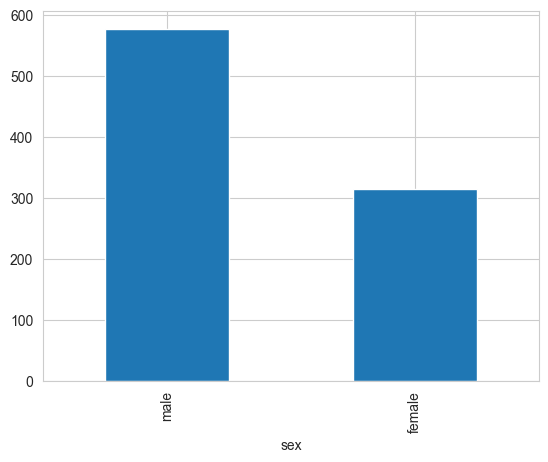

In [22]:
df.sex.value_counts().plot(kind='bar')

<Axes: xlabel='sex', ylabel='count'>

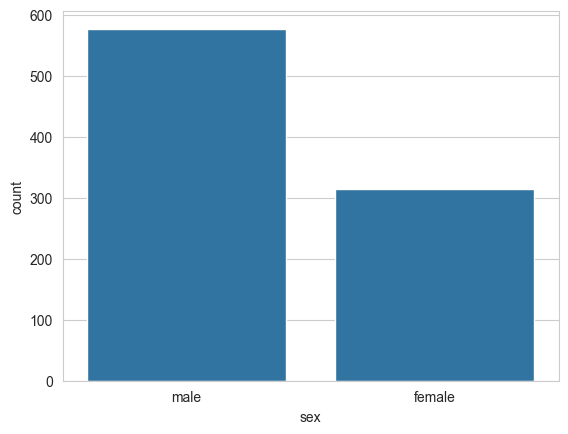

In [23]:
sns.countplot(data=df,x="sex")

<Axes: xlabel='sex', ylabel='count'>

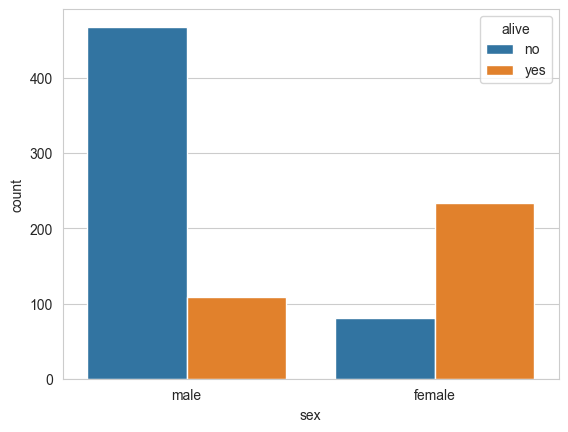

In [6]:
sns.countplot(data=df,x="sex",hue="alive")

<Axes: xlabel='who', ylabel='count'>

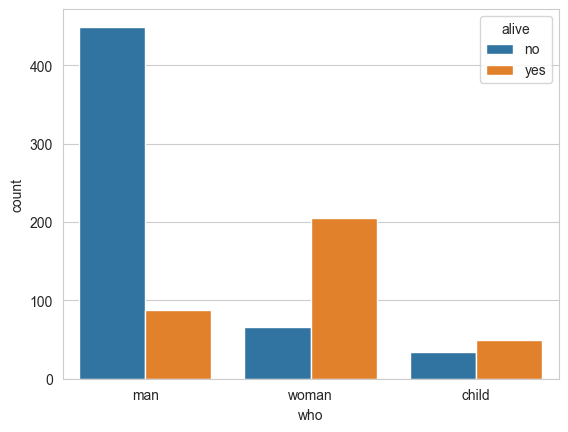

In [7]:
sns.countplot(data=df,x="who",hue="alive")

In [10]:
pd.crosstab(df['who'], df['alive'])

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


<Axes: xlabel='who', ylabel='count'>

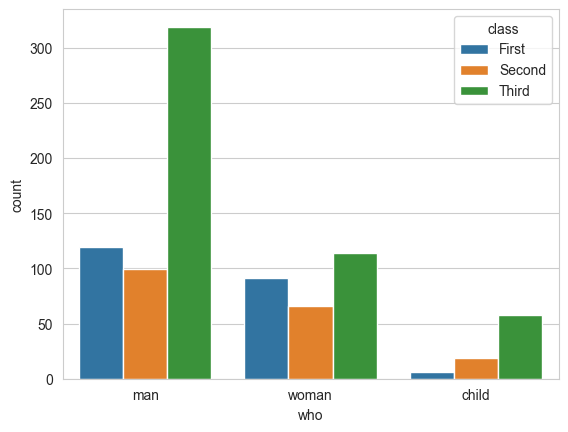

In [11]:
sns.countplot(data=df,x="who",hue="class")

<Axes: xlabel='alive', ylabel='count'>

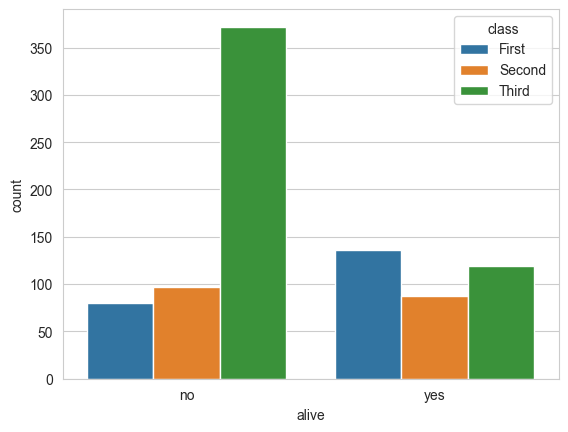

In [12]:
sns.countplot(data=df,x="alive",hue="class")

<Axes: xlabel='class', ylabel='count'>

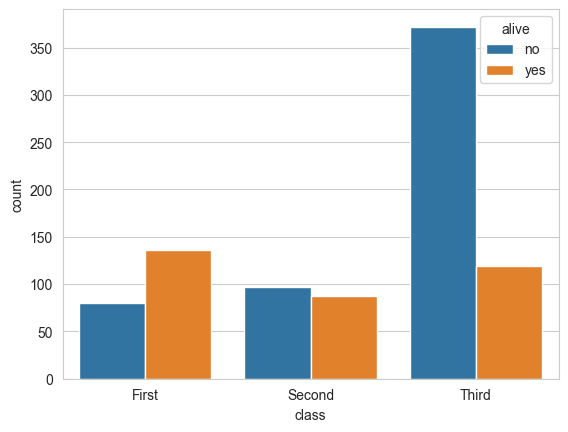

In [13]:
sns.countplot(data=df,x="class",hue="alive")

In [15]:
df.who.replace({"man":0,"woman":0,"child":1}).value_counts()

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_25944\1235103737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.who.replace({"man":0,"woman":0,"child":1}).value_counts()


who
0    808
1     83
Name: count, dtype: int64

In [28]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [20]:
children_df = df[df["who"] == "child"]
children_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.00,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


<Axes: xlabel='class', ylabel='count'>

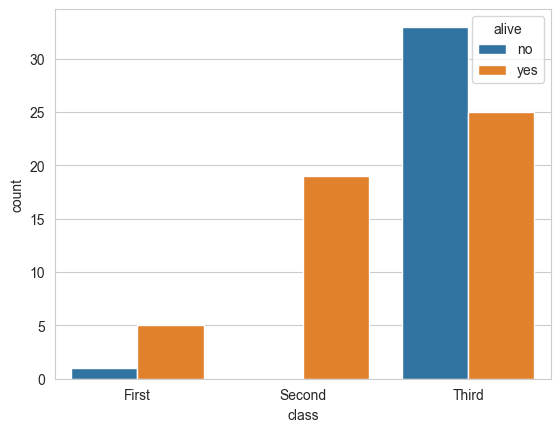

In [25]:
sns.countplot(data=children_df, x="class", hue="alive")

In [30]:
pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),[df["class"],df.alive])

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_25944\3972648140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),[df["class"],df.alive])


class First      Second     Third    
alive    no  yes     no yes    no yes
who                                  
0        79  131     97  68   339  94
1         1    5      0  19    33  25

In [31]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

<Axes: xlabel='class'>

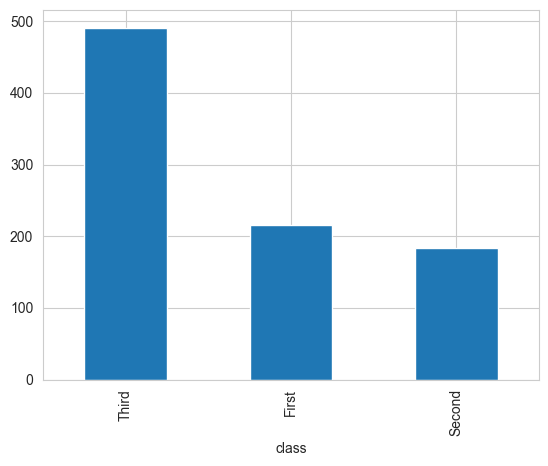

In [32]:
df["class"].value_counts().plot(kind='bar')

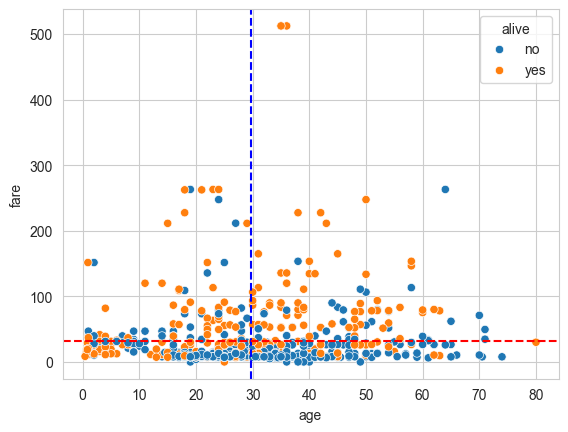

In [53]:
sns.scatterplot(data=df,x=df["age"],y=df["fare"], hue="alive")
mean_age = df[df["pclass"]>=1].age.mean()
mean_fare = df["fare"].mean()
plt.axvline(mean_age, color='blue', linestyle='--', label=f'Mean Age: {mean_age:.1f}')
plt.axhline(mean_fare, color='red', linestyle='--', label=f'Mean Fare: {mean_fare:.1f}')

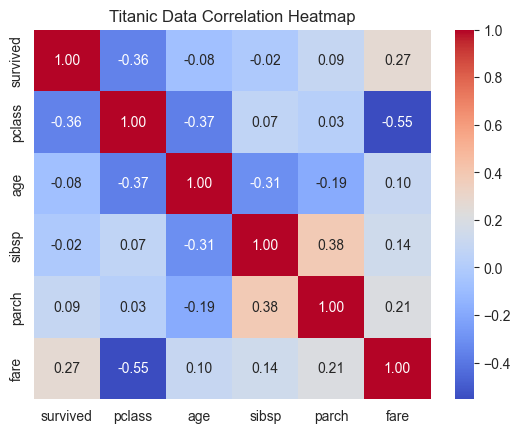

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("titanic")

df_clean = df.dropna(subset=["age", "fare"])

df_numeric = df_clean.select_dtypes(include=['number'])
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show plot
plt.title("Titanic Data Correlation Heatmap")
plt.show()

In [40]:
# Make a copy to avoid modifying the original DataFrame
df_corr = df.copy()

# Map class to numeric
df_corr['pclass_num'] = df_corr['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# Check for missing values and drop them if needed
df_corr = df_corr.dropna(subset=['survived', 'pclass_num'])

# Calculate the correlation
corr = df_corr['survived'].corr(df_corr['pclass_num'])

print(f"Correlation between survived and class: {corr:.3f}")

Correlation between survived and class: -0.338
